In [1]:
#Dependencies
import requests as req
import json
# pip install citipy
from citipy import citipy # downloaded from https://pypi.python.org/pypi/citipy
# https://github.com/wingchen/citipy for how to use it and more info about it

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# coordinates: (latitude (horizontal), longitude (vertical))
    #coordinate range: ([-90,90], [-180, 180])
city = citipy.nearest_city(-100, 90).city_name
country = citipy.nearest_city(-100, 90).country_code

# Testing to see if coordinates work 
test = [[city, country]]
test[0]

['albany', 'au']

In [3]:
# url, api key for openweathermap (OWM)
url = ' http://api.openweathermap.org/data/2.5/weather' #For how to use OWM's api: https://openweathermap.org/current
apiKey = 'c8e2baf63c2571f94bf9d95c94483400' # my requested api key

payload_Test = {'APPID':apiKey, 'units':'imperial', 'q': str(test[0][0]) + ',' + str(test[0][1])} # q doesn't seem to be case sensitive


testResp = req.get(url, params=payload_Test)
weather = testResp.json()

# Testing to see if OpenWeatherMap can find test city and country
weather

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -35.02, 'lon': 117.89},
 'dt': 1512830826,
 'id': 2077963,
 'main': {'grnd_level': 1014,
  'humidity': 50,
  'pressure': 1014,
  'sea_level': 1026.61,
  'temp': 69.95,
  'temp_max': 69.95,
  'temp_min': 69.95},
 'name': 'Albany',
 'sys': {'country': 'AU',
  'message': 0.1706,
  'sunrise': 1512766051,
  'sunset': 1512818081},
 'weather': [{'description': 'few clouds',
   'icon': '02n',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 13.5021, 'speed': 1.05}}

In [4]:
# Sample of 500 countries from citipy

#loop to fill the sample list with 600 entries
def getCitySample(number):
    sample_ls = []
    city_ls = []
    country_ls = []
    
    #while sample is less than the sample number
    while len(sample_ls) < number:
        Lati = np.random.uniform(low = -90, high = 90) #random lat and long values to be input into citypy
        Longi = np.random.uniform(low = -180, high = 180)

        #get nearest city name and country code (in case city name is common one)
        city = citipy.nearest_city(Lati, Longi).city_name
        country = citipy.nearest_city(Lati, Longi).country_code

        #check if city name is in the sample list
        duplicate = False
        for entry in sample_ls:
            if city == entry[0] and country == entry [1]:
                duplicate = True
                break
            else:
                continue
        if duplicate == False:
            city_ls.append(city)
            country_ls.append(country)
            sample_ls.append([city, country])

            
    #dataframe of the sample of cities
    columns=['Country', 'Date', 'TimeStamp', 'Cloudiness', 'Humidity', 'Latitude', 'Longitude',\
             'Max Temp', 'Wind Speed (mph)']
    df = pd.DataFrame(data=sample_ls, index=city_ls)
    df = df.reindex(columns=columns) #set blank columns
    df['Country'] = country_ls # add in country abbreviations

    return df

# get sample of cities == 600
citySample_df = getCitySample(600)

citySample_df
    

,Country,Date,TimeStamp,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed (mph)
illoqqortoormiut,gl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rikitea,pf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
puerto ayora,ec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
busselton,au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taolanaro,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabo san lucas,mx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bredasdorp,za,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phan rang,vn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anadyr,ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ribeira grande,pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# url, api key for openweathermap (OWM)
url = ' http://api.openweathermap.org/data/2.5/weather' #For how to use OWM's api: https://openweathermap.org/current
apiKey = 'c8e2baf63c2571f94bf9d95c94483400' # my requested api key

# loop through dataframe to get values for each index
def getWeather(df):
    count = 0
    drop_count = 0 # count the number of dropped values 
    for index, row in df.iterrows():
        #print log of each city as it's being processed. 
        print('Processing Record Number ' + str(count+1) + ' | ' + index)
    
        #get weather data based on city and country
        payload_sampl = {'APPID':apiKey, 'units':'imperial', 'q': index + ',' + row['Country']} 
            # q doesn't seem to be case sensitive
        weather = req.get(url, params=payload_sampl)
        weather_json = weather.json()
        try:     
            if weather_json['cod'] == 200: #'cod' seems to equal '404' if city isn't found in OWM. 'cod' == 200 otherwise. 
                df.set_value(index, 'TimeStamp', weather_json['dt'])
                df.set_value(index, 'Latitude', weather_json['coord']['lat'])
                df.set_value(index, 'Longitude', weather_json['coord']['lon'])
                df.set_value(index, 'Max Temp', weather_json['main']['temp_max'])
                df.set_value(index, 'Humidity', weather_json['main']['humidity'])
                df.set_value(index, 'Cloudiness', weather_json['clouds']['all']) #measure of cloudiness?
                df.set_value(index, 'Wind Speed (mph)', weather_json['wind']['speed'])
                print(weather.url)
            if weather_json['cod'] == '404':
                df.drop(index, inplace=True)
                drop_count += 1
                print('City Not Found! Dropping the Row in the DataFrame! | ' +  'Row(s) dropped: '+ str(drop_count))
                print(weather.url)
        except ValueError:
            df.drop(index, inplace=True)
            print('There was a ValueError!')
            continue
        
        count += 1
    print('\n' + str(len(df)) + ' total rows.')
    print('\n' + str(drop_count) + ' row(s) have been dropped due to absence in the OWM api.')
    
    return(df)

#get weather for citySample_df
citySample_df = getWeather(citySample_df)
citySample_df

Processing Record Number 1 | illoqqortoormiut
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 1
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=illoqqortoormiut%2Cgl
Processing Record Number 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=rikitea%2Cpf
Processing Record Number 3 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=puerto+ayora%2Cec
Processing Record Number 4 | busselton
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=busselton%2Cau
Processing Record Number 5 | taolanaro
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 2
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=taolanaro%2Cmg
Processing Record Number 6 | cabo san lucas
http://api.op

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=tautira%2Cpf
Processing Record Number 50 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=qaanaaq%2Cgl
Processing Record Number 51 | punta arenas
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=punta+arenas%2Ccl
Processing Record Number 52 | angoche
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 11
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=angoche%2Cmz
Processing Record Number 53 | birkeland
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=birkeland%2Cno
Processing Record Number 54 | gambela
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=gambela%2Cet
Processing Record Number 55 

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=hilo%2Cus
Processing Record Number 98 | kishi
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=kishi%2Cng
Processing Record Number 99 | porto walter
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=porto+walter%2Cbr
Processing Record Number 100 | tazmalt
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=tazmalt%2Cdz
Processing Record Number 101 | mao
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=mao%2Ctd
Processing Record Number 102 | bethel
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=bethel%2Cus
Processing Record Number 103 | georgetown
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=kieta%2Cpg
Processing Record Number 148 | keti bandar
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=keti+bandar%2Cpk
Processing Record Number 149 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=ostrovnoy%2Cru
Processing Record Number 150 | el balyana
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 28
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=el+balyana%2Ceg
Processing Record Number 151 | nizhneudinsk
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=nizhneudinsk%2Cru
Processing Record Number 152 | ixtapa
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=ixtapa%2Cmx
Processing Re

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=sao+jose+da+coroa+grande%2Cbr
Processing Record Number 197 | raudeberg
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 36
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=raudeberg%2Cno
Processing Record Number 198 | thompson
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=thompson%2Cca
Processing Record Number 199 | kutum
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=kutum%2Csd
Processing Record Number 200 | hamilton
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=hamilton%2Cbm
Processing Record Number 201 | yar-sale
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=yar-sale%2Cru
Processing Rec

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=geraldton%2Cau
Processing Record Number 246 | katherine
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=katherine%2Cau
Processing Record Number 247 | kurilsk
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=kurilsk%2Cru
Processing Record Number 248 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=kudahuvadhoo%2Cmv
Processing Record Number 249 | hervey bay
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 43
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=hervey+bay%2Cau
Processing Record Number 250 | martapura
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=martapura%2Cid
Processing 

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=mecca%2Csa
Processing Record Number 294 | hildburghausen
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=hildburghausen%2Cde
Processing Record Number 295 | saleaula
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 53
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=saleaula%2Cws
Processing Record Number 296 | pionerskiy
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=pionerskiy%2Cru
Processing Record Number 297 | syamzha
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=syamzha%2Cru
Processing Record Number 298 | buritis
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=buritis%2Cbr
Processing Record

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=vardo%2Cno
Processing Record Number 344 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=lakes+entrance%2Cau
Processing Record Number 345 | deer lake
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=deer+lake%2Cca
Processing Record Number 346 | gopalpur
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=gopalpur%2Cin
Processing Record Number 347 | ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=ornskoldsvik%2Cse
Processing Record Number 348 | sao desiderio
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=sao+desiderio%2Cbr
Processing Record Number 349 | marsh harbour
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=nova+soure%2Cbr
Processing Record Number 393 | gazanjyk
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=gazanjyk%2Ctm
Processing Record Number 394 | kaniama
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=kaniama%2Ccd
Processing Record Number 395 | portland
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=portland%2Cau
Processing Record Number 396 | ancud
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=ancud%2Ccl
Processing Record Number 397 | the valley
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=the+valley%2Cai
Processing Record Number 398 | lumut
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=chiredzi%2Czw
Processing Record Number 442 | sujiatun
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=sujiatun%2Ccn
Processing Record Number 443 | chuzhou
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=chuzhou%2Ccn
Processing Record Number 444 | chibuto
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=chibuto%2Cmz
Processing Record Number 445 | areosa
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=areosa%2Cpt
Processing Record Number 446 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=abu+dhabi%2Cae
Processing Record Number 447 | evensk
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c257

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=egvekinot%2Cru
Processing Record Number 492 | villanueva
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=villanueva%2Cco
Processing Record Number 493 | chimbote
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=chimbote%2Cpe
Processing Record Number 494 | obuasi
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=obuasi%2Cgh
Processing Record Number 495 | dalinghe
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 80
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=dalinghe%2Ccn
Processing Record Number 496 | richards bay
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=richards+bay%2Cza
Processing Record

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=sur%2Com
Processing Record Number 540 | torbay
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=torbay%2Cca
Processing Record Number 541 | kodinsk
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=kodinsk%2Cru
Processing Record Number 542 | flic en flac
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=flic+en+flac%2Cmu
Processing Record Number 543 | olafsvik
City Not Found! Dropping the Row in the DataFrame! | Row(s) dropped: 88
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=olafsvik%2Cis
Processing Record Number 544 | mwinilunga
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=mwinilunga%2Czm
Processing Record Number 

http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=tahoua%2Cne
Processing Record Number 589 | ahipara
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=ahipara%2Cnz
Processing Record Number 590 | muros
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=muros%2Ces
Processing Record Number 591 | zyryanskoye
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=zyryanskoye%2Cru
Processing Record Number 592 | kushalgarh
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=kushalgarh%2Cin
Processing Record Number 593 | peniche
http://api.openweathermap.org/data/2.5/weather?APPID=c8e2baf63c2571f94bf9d95c94483400&units=imperial&q=peniche%2Cpt
Processing Record Number 594 | stephenville
http://api.openweathermap.org/data/2.5/weather?APPID=c8e

,Country,Date,TimeStamp,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed (mph)
rikitea,pf,NaN,1.512831e+09,36.0,99.0,-23.12,-134.97,78.23,5.97
puerto ayora,ec,NaN,1.512828e+09,75.0,83.0,-0.74,-90.35,73.40,12.75
busselton,au,NaN,1.512831e+09,0.0,87.0,-33.65,115.33,72.02,12.01
cabo san lucas,mx,NaN,1.512831e+09,32.0,100.0,22.89,-109.91,76.16,15.82
bredasdorp,za,NaN,1.512828e+09,0.0,49.0,-34.53,20.04,71.60,17.22
anadyr,ru,NaN,1.512828e+09,90.0,84.0,64.75,177.48,8.60,4.47
ribeira grande,pt,NaN,1.512830e+09,20.0,83.0,38.52,-28.70,69.80,2.24
talnakh,ru,NaN,1.512831e+09,80.0,77.0,69.49,88.40,7.31,18.28
tiksi,ru,NaN,1.512831e+09,44.0,67.0,71.69,128.87,-14.74,3.85
huarmey,pe,NaN,1.512831e+09,36.0,77.0,-10.07,-78.15,68.42,3.40


In [6]:
# adding to df if length of citySample_df < 500
def addCitiesTo(number, df):
    while len(df) < number:
        addCities_df = getCitySample(number-len(df))
        addCities_df = getWeather(addCities_df)
    
        # append addCities_df to citySample_df
        df = df.append(addCities_df)
        print ('\n' + 'Total rows in dataframe: ' + str(len(df)) + '\n')
    return df

# add cities to citySample_df
citySample_df = addCitiesTo(500, citySample_df)
citySample_df

,Country,Date,TimeStamp,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed (mph)
rikitea,pf,NaN,1.512831e+09,36.0,99.0,-23.12,-134.97,78.23,5.97
puerto ayora,ec,NaN,1.512828e+09,75.0,83.0,-0.74,-90.35,73.40,12.75
busselton,au,NaN,1.512831e+09,0.0,87.0,-33.65,115.33,72.02,12.01
cabo san lucas,mx,NaN,1.512831e+09,32.0,100.0,22.89,-109.91,76.16,15.82
bredasdorp,za,NaN,1.512828e+09,0.0,49.0,-34.53,20.04,71.60,17.22
anadyr,ru,NaN,1.512828e+09,90.0,84.0,64.75,177.48,8.60,4.47
ribeira grande,pt,NaN,1.512830e+09,20.0,83.0,38.52,-28.70,69.80,2.24
talnakh,ru,NaN,1.512831e+09,80.0,77.0,69.49,88.40,7.31,18.28
tiksi,ru,NaN,1.512831e+09,44.0,67.0,71.69,128.87,-14.74,3.85
huarmey,pe,NaN,1.512831e+09,36.0,77.0,-10.07,-78.15,68.42,3.40


In [7]:
# Formatting citySample dataframe
    #drop cases where row is all NaN just in case
citySample_df['Max Temp'].dropna(axis=0, inplace=True)

        #format date from unix timestamp 
citySample_df['TimeStamp'] = pd.to_datetime(citySample_df['TimeStamp'], unit='s')

citySample_df['Date'] = [d.date() for d in citySample_df['TimeStamp']]

#save to csv in same folder as code
citySample_df.to_csv('citySample_dataframe.csv')

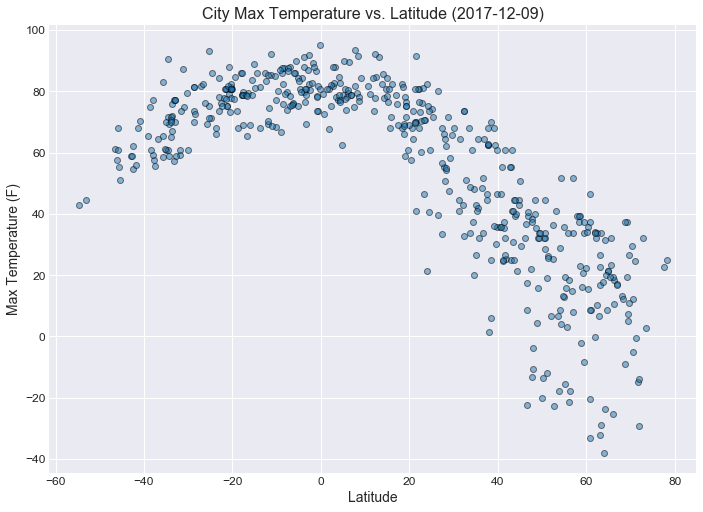

In [8]:
#Scatterplot of Temperature (F) vs. Latitude
sns.set_style('dark')

# Set figuresize, grid, and plot scatterplot
fig, ax = plt.subplots(figsize=(11.6, 8.25))
ax.grid(linestyle='-', linewidth=1)
plt.scatter(x=citySample_df['Latitude'], y=citySample_df['Max Temp'], edgecolor='black', alpha=0.5)

#Set titles and font sizes
plt.title('City Max Temperature vs. Latitude' + ' (' + str(citySample_df['Date'].iloc[0]) + ')', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Max Temperature (F)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#save as png file
fig.savefig('City Max Temperature vs. Latitude.png')

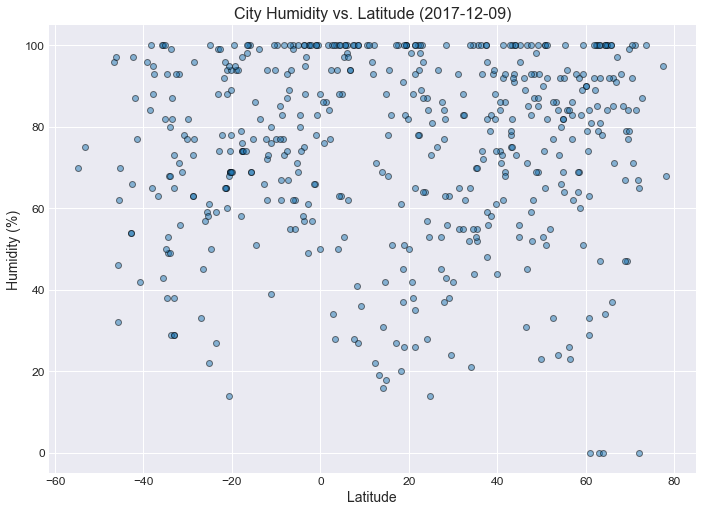

In [9]:
# Scatterplot of Humidity (%) vs. Latitude

sns.set_style('dark')

# Set figuresize, grid, and plot scatterplot
fig, ax = plt.subplots(figsize=(11.6, 8.25))
ax.grid(linestyle='-', linewidth=1)
plt.scatter(x=citySample_df['Latitude'], y=citySample_df['Humidity'], edgecolor='black', alpha=0.5)

#Set titles and font sizes
plt.title('City Humidity vs. Latitude' + ' (' + str(citySample_df['Date'].iloc[0]) + ')', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Humidity (%)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#save as png file
fig.savefig('City Humidity vs. Latitude.png')

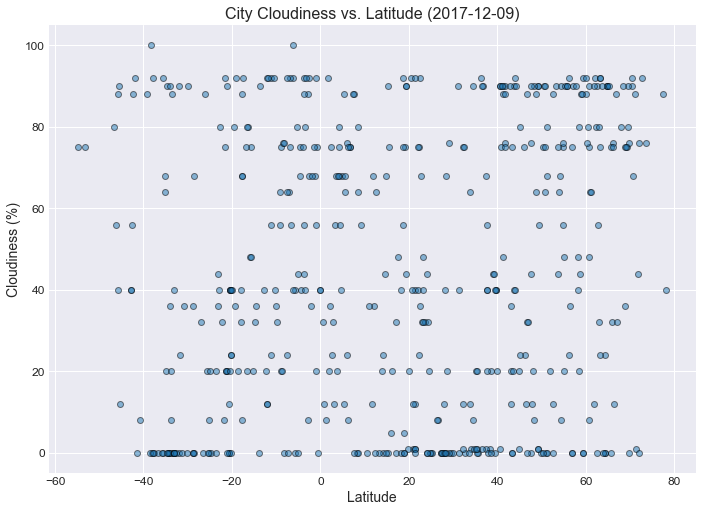

In [10]:
#Scatterplot of Cloudiness (%) vs. Latitude

sns.set_style('dark')

# Set figuresize, grid, and plot scatterplot
fig, ax = plt.subplots(figsize=(11.6, 8.25))
ax.grid(linestyle='-', linewidth=1)
plt.scatter(x=citySample_df['Latitude'], y=citySample_df['Cloudiness'], edgecolor='black', alpha=0.5)

#Set titles
plt.title('City Cloudiness vs. Latitude' + ' (' + str(citySample_df['Date'].iloc[0]) + ')', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Cloudiness (%)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#save as png file
fig.savefig('City Cloudiness vs. Latitude.png')

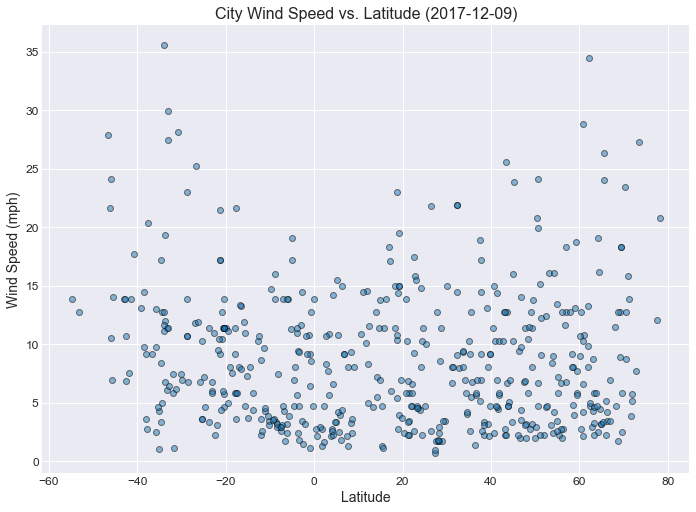

In [11]:
# Scatterplot of Wind Speed (mph) vs. Latitude

sns.set_style('dark')

# Set figuresize, grid, and plot scatterplot
fig, ax = plt.subplots(figsize=(11.6, 8.25))
ax.grid(linestyle='-', linewidth=1)
plt.scatter(x=citySample_df['Latitude'], y=citySample_df['Wind Speed (mph)'], edgecolor='black', alpha=0.5)

# Set titles
plt.title('City Wind Speed vs. Latitude' + ' (' + str(citySample_df['Date'].iloc[0]) + ')', fontsize = 16)
plt.xlabel('Latitude', fontsize = 14)
plt.ylabel('Wind Speed (mph)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#save as png file
fig.savefig('City Wind Speed vs. Latitude.png')